In [12]:
# Setting up dependencies to be utilized later here.
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import calendar


In [13]:
# Converting .csv file into a dataframe for data manipulation
wa_lottery_path_2020 = Path("Resources/2020_lottery_data.csv")
wa_lottery_df_2020 = pd.read_csv(wa_lottery_path_2020)

# displaying .csv just to see what data we have
wa_lottery_df_2020

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,1/1/2020,Wed,49-53-57-59-62,26,2,220000000
1,1/4/2020,Sat,1-11-21-25-54,7,2,237000000
2,1/8/2020,Wed,2-4-7-43-56,22,4,258000000
3,1/11/2020,Sat,3-21-23-31-59,3,2,277000000
4,1/15/2020,Wed,39-41-53-55-68,19,2,296000000
...,...,...,...,...,...,...
100,12/16/2020,Wed,4-23-37-61-67,7,2,287000000
101,12/19/2020,Sat,27-32-34-43-52,13,2,304000000
102,12/23/2020,Wed,6-13-38-39-53,6,3,321000000
103,12/26/2020,Sat,10-24-27-35-53,18,2,341000000


In [14]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerball'
weekday_powerball_2020 = wa_lottery_df_2020[['weekday','powerball']]

# groupby weekday (sets index to weekday), for the column 'powerball' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
# lambda is a keyword that is built into python to create a anonymous function
# lambda : An anonymous inline function consisting of a single expression which is evaluated when the function is called. 
# The syntax to create a lambda function is lambda [parameters]: expression.  This is from the official python documentation
powerball_grouped_2020 = weekday_powerball_2020.groupby('weekday')['powerball'].apply(lambda x: x.mode())

# powerball_grouped_2020

In [15]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerplay'
weekday_powerplay_2020 = wa_lottery_df_2020[['weekday', 'powerplay']]

# groupby weekday (sets index to weekday), for the column 'powerplay' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
powerplay_grouped_2020 = weekday_powerplay_2020.groupby('weekday')['powerplay'].apply(lambda x: x.mode())

# powerplay_grouped_2020

In [16]:
# Combine powerplay/powerball common 2020 DataFrames
combined_common_weekday_2020 = pd.merge(powerball_grouped_2020, powerplay_grouped_2020, left_index=True, right_index=True)

combined_common_weekday_2020

,,powerball,powerplay
weekday,,,
Sat,0,18,2
Wed,0,2,2


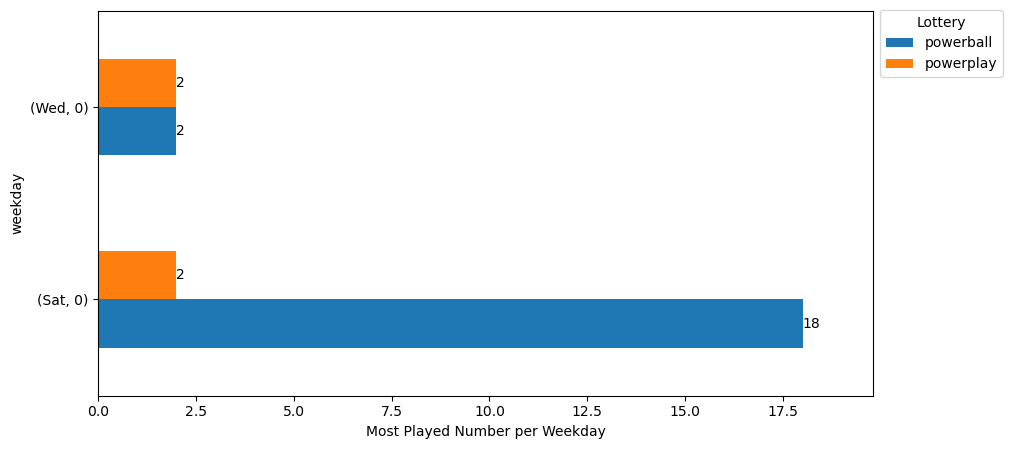

In [17]:
# generate a graph, bar, pie, not sure which one would represent the data better
# Plot bar chart
data = combined_common_weekday_2020.plot(kind = 'barh', ylabel = 'weekday', figsize = (10,5))
data.set(xlabel = 'Most Played Number per Weekday')
for c in data.containers:
    data.bar_label(c, fmt = '%.0f', label_type = 'edge')
data.margins(x = 0.1)
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [18]:
# create a copy of the original dataframe with columns 'date' and 'powerball'
# This will eliminate any warnings about the original dataframes index
date_powerball_2020 = wa_lottery_df_2020[['date', 'powerball']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerball_2020['date'] = pd.to_datetime(date_powerball_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerball_2020['month'] = date_powerball_2020['date'].dt.month

# make a variable that holds a dataframe that is grouped by month
month = date_powerball_2020.groupby('month')

# create an empty dictionary
powerball_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    powerball_common_2020[i] = month_data['powerball'].max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerball_common_months_2020 = pd.DataFrame.from_dict(powerball_common_2020, orient='index', columns=['Common Powerball'])  

There were three most frequent numbers that were called out of 12 months and that was 18, 5, 4.  Choosing these numbers increases your odds of winning at most 4$ even if your winning numbers didn't match.

In [19]:
# create a copy of the original dataframe with columns 'date' and 'powerplay'
# This will eliminate any warnings about the original dataframes index
date_powerplay_2020 = wa_lottery_df_2020[['date', 'powerplay']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerplay_2020['date'] = pd.to_datetime(date_powerplay_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerplay_2020['month'] = date_powerplay_2020['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball_2020
month = date_powerplay_2020.groupby('month')

# create an empty dictionary
powerplay_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    powerplay_common_2020[i] = month_data['powerplay'].max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerplay_common_months_2020 = pd.DataFrame.from_dict(powerplay_common_2020, orient='index', columns=['Common Powerplay'])

In [20]:
# combine the two dataframes that hold the months together
combined_common_months_2020 = pd.merge(powerplay_common_months_2020, powerball_common_months_2020, left_index=True, right_index=True)

# Use calendar library for abbreviations and order
month = dict((enumerate(calendar.month_abbr)))

# rename function for index change
combined_common_months_2020 = combined_common_months_2020.rename(index=month)

combined_common_months_2020

,Common Powerplay,Common Powerball
Jan,4,26
Feb,4,25
Mar,4,23
Apr,5,24
May,5,24
Jun,5,23
Jul,10,26
Aug,10,24
Sep,4,24
Oct,3,26


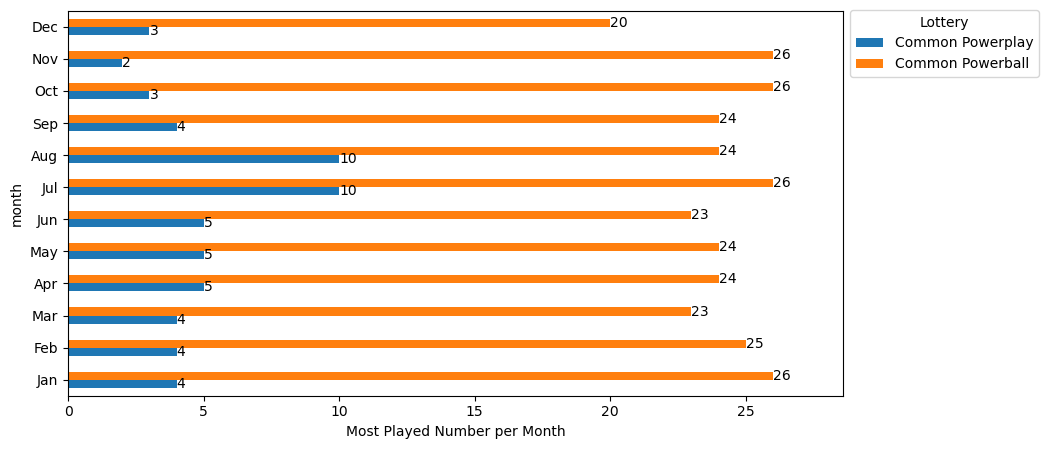

In [21]:
# Plot combined data for the Powerplay/Powerball for the month
data = combined_common_months_2020.plot(kind = 'barh', ylabel = 'month', figsize = (10,5))
data.set(xlabel = 'Most Played Number per Month')
for c in data.containers:
    data.bar_label(c, fmt = '%.0f', label_type = 'edge')
data.margins(x = 0.1)
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [22]:
# generate a new dataframe to hold year data for weekday, powerplay, powerball
year_tot_common_2020 = wa_lottery_df_2020.copy()
powerlist = ['powerball', 'powerplay']
# use the same function as before to find the maxiumum value that is repeated over the entire year for powerplay and powerball
year_common_powernums_2020= year_tot_common_2020.groupby('weekday')[powerlist].apply(lambda x: x.mode().max())

year_common_powernums_2020

,powerball,powerplay
weekday,,
Sat,18,2
Wed,2,2


In [30]:
# make a copy of the original DataFrame to manipulate
month_lottery_df_2020 = wa_lottery_df_2020.copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
month_lottery_df_2020['date'] = pd.to_datetime(month_lottery_df_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
month_lottery_df_2020['month'] = month_lottery_df_2020['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball_2020
month = month_lottery_df_2020.groupby('month')

# create an empty dictionary
jackpot_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    jackpot_common_2020[i] = month_data['jackpot'].max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
jackpot_common_months_2020 = pd.DataFrame.from_dict(jackpot_common_2020, orient='index', columns=['Common Jackpot'])

# https://stackoverflow.com/questions/61842649/renaming-months-from-number-to-name-in-pandas
# Utilizing pythons calendar function, converted the index to the abbreviated months
# Use calendar library for month name
month = dict((enumerate(calendar.month_name)))

# add month to dataframe
jackpot_common_months_2020['Months'] = month


# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_months_jackpot = jackpot_common_months_2020.sort_values(by=['Common Jackpot'], ascending = False)


print(top_months_jackpot.head(5))

    Common Jackpot    Months
1        394000000   January
12       363000000  December
11       216000000  November
4        190000000     April
8        169000000    August


Appears I have November, December, and January are my highest value months to win the jackpot.  Possible people have more spending money because of holiday bonuses leading into the holiday season so more money is poured into the gambling system.

In [24]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'jackpot'
weekday_powerball_2020 = wa_lottery_df_2020[['weekday', 'jackpot']]

# find the highest jackpot
powerball_grouped_2020 = weekday_powerball_2020.groupby('weekday')['jackpot'].apply(lambda x: x.max())

powerball_grouped_2020

weekday
Sat    373000000
Wed    394000000
Name: jackpot, dtype: int64

In [25]:
# scatter plot every wednesday for the year of 2020 to show the greatest 